In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
from math import log
import copy
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("GoogleStocks.csv")
data = data.drop('date',axis=1)
data = data[1:]
data

close   volume      open       high        low
1    1184.62  1894639  1198.530  1202.8300  1176.7200
2    1193.00  1493841  1196.930  1206.3975  1187.0400
3    1205.50  1668910  1226.320  1230.0000  1202.8250
4    1231.54  1195899  1216.000  1231.7900  1213.1500
5    1223.97  2089367  1197.350  1227.1400  1196.1700
6    1198.85  1404863  1188.810  1200.0000  1185.8700
7    1184.26  1212506  1183.300  1190.0000  1177.4211
8    1184.46  2457597  1193.380  1196.5700  1182.6100
9    1185.55  1150950  1194.510  1197.8800  1184.4800
10   1193.32  1434816  1200.645  1200.9300  1191.9400
11   1193.20  2012306  1178.260  1200.0000  1178.2600
12   1175.76  1569332  1144.450  1176.1900  1144.4500
13   1142.32  1212271  1126.730  1147.0800  1123.3000
14   1143.30  1166076  1155.720  1156.7550  1134.9100
15   1157.86  1094100  1162.490  1167.5658  1155.4900
16   1162.03  1422357  1150.060  1169.6100  1146.1950
17   1147.80  1444774  1146.990  1158.2804  1130.6900
18   1140.99  1447454  1124.900  1142.9700  1124.7500
19   1119.92  1541068  1111.300  1127.6500  1111.0100
20   1116.05   968362  1106.950  1117.9800  1101.0000
21   1115.13  1469761  1105.750  1119.5100  1099.9200
22   1109.40  1395281  1116.000  1118.5400  1107.2700
23   1110.37  1048361  1100.900  1111.2400  1095.6000
24   1096.97  1414744  1110.840  1111.9400  1092.5200
25   1113.80  1080144  1119.990  1123.4100  1105.2800
26   1118.56  1046315  1110.000  1121.8900  1110.0000
27   1113.65  1442461  1130.080  1131.6700  1110.6500
28   1121.67   941678  1118.050  1128.2300  1110.4450
29   1120.16  1048630  1124.990  1134.7300  1118.5000
30   1121.37  1608658  1106.800  1125.2950  1105.8500
..       ...      ...       ...        ...        ...
726   711.12  1828508   698.380   711.8600   698.1067
727   701.43  1680220   697.700   702.3199   695.7200
728   695.70  1692757   690.490   699.7500   689.0100
729   692.36  1541297   696.870   697.8400   692.0000
730   698.21  1645013   697.630   700.6400   691.0000
731   693.01  2486584   690.700   697.6200   689.0000
732   691.02  2859790   708.260   714.1700   689.5500
733   705.84  3094905   707.290   708.9800   692.3651
734   708.14  2739133   725.420   725.7660   703.0264
735   723.15  1956956   716.100   723.9300   715.5900
736   718.77  5949699   726.300   736.1200   713.6100
737   759.14  2995094   755.380   760.4500   749.5500
738   752.67  1526776   758.000   758.1315   750.0100
739   753.93  2027962   769.510   769.9000   749.3300
740   766.61  1557199   760.460   768.0500   757.3000
741   759.00  1807062   753.980   761.0000   752.6938
742   753.20  1134056   754.010   757.3100   752.7050
743   751.72  1707397   749.160   754.3800   744.2610
744   743.09  1349780   738.000   743.8300   731.0100
745   736.10  1218789   743.020   745.0000   736.0500
746   739.15  1289869   743.970   745.4500   735.5500
747   740.28  1452369   745.370   746.9999   736.2800
748   745.69  1052171   735.770   746.2400   735.5600
749   737.80  1130817   738.000   742.8000   735.3700
750   745.29  1134214   750.060   752.8000   742.4300
751   749.91  1576240   738.600   750.3400   737.0000
752   744.95  1718638   749.250   750.8500   740.9400
753   750.53  1782278   750.100   757.8800   748.7400
754   744.77  1902254   734.590   747.2500   728.7600
755   733.53  1300817   736.790   738.9900   732.5000

[755 rows x 5 columns]

In [3]:
data['average'] = (data['high'] + data['low'])/2
data

close   volume      open       high        low     average
1    1184.62  1894639  1198.530  1202.8300  1176.7200  1189.77500
2    1193.00  1493841  1196.930  1206.3975  1187.0400  1196.71875
3    1205.50  1668910  1226.320  1230.0000  1202.8250  1216.41250
4    1231.54  1195899  1216.000  1231.7900  1213.1500  1222.47000
5    1223.97  2089367  1197.350  1227.1400  1196.1700  1211.65500
6    1198.85  1404863  1188.810  1200.0000  1185.8700  1192.93500
7    1184.26  1212506  1183.300  1190.0000  1177.4211  1183.71055
8    1184.46  2457597  1193.380  1196.5700  1182.6100  1189.59000
9    1185.55  1150950  1194.510  1197.8800  1184.4800  1191.18000
10   1193.32  1434816  1200.645  1200.9300  1191.9400  1196.43500
11   1193.20  2012306  1178.260  1200.0000  1178.2600  1189.13000
12   1175.76  1569332  1144.450  1176.1900  1144.4500  1160.32000
13   1142.32  1212271  1126.730  1147.0800  1123.3000  1135.19000
14   1143.30  1166076  1155.720  1156.7550  1134.9100  1145.83250
15   1157.86  1094100  1162.490  1167.5658  1155.4900  1161.52790
16   1162.03  1422357  1150.060  1169.6100  1146.1950  1157.90250
17   1147.80  1444774  1146.990  1158.2804  1130.6900  1144.48520
18   1140.99  1447454  1124.900  1142.9700  1124.7500  1133.86000
19   1119.92  1541068  1111.300  1127.6500  1111.0100  1119.33000
20   1116.05   968362  1106.950  1117.9800  1101.0000  1109.49000
21   1115.13  1469761  1105.750  1119.5100  1099.9200  1109.71500
22   1109.40  1395281  1116.000  1118.5400  1107.2700  1112.90500
23   1110.37  1048361  1100.900  1111.2400  1095.6000  1103.42000
24   1096.97  1414744  1110.840  1111.9400  1092.5200  1102.23000
25   1113.80  1080144  1119.990  1123.4100  1105.2800  1114.34500
26   1118.56  1046315  1110.000  1121.8900  1110.0000  1115.94500
27   1113.65  1442461  1130.080  1131.6700  1110.6500  1121.16000
28   1121.67   941678  1118.050  1128.2300  1110.4450  1119.33750
29   1120.16  1048630  1124.990  1134.7300  1118.5000  1126.61500
30   1121.37  1608658  1106.800  1125.2950  1105.8500  1115.57250
..       ...      ...       ...        ...        ...         ...
726   711.12  1828508   698.380   711.8600   698.1067   704.98335
727   701.43  1680220   697.700   702.3199   695.7200   699.01995
728   695.70  1692757   690.490   699.7500   689.0100   694.38000
729   692.36  1541297   696.870   697.8400   692.0000   694.92000
730   698.21  1645013   697.630   700.6400   691.0000   695.82000
731   693.01  2486584   690.700   697.6200   689.0000   693.31000
732   691.02  2859790   708.260   714.1700   689.5500   701.86000
733   705.84  3094905   707.290   708.9800   692.3651   700.67255
734   708.14  2739133   725.420   725.7660   703.0264   714.39620
735   723.15  1956956   716.100   723.9300   715.5900   719.76000
736   718.77  5949699   726.300   736.1200   713.6100   724.86500
737   759.14  2995094   755.380   760.4500   749.5500   755.00000
738   752.67  1526776   758.000   758.1315   750.0100   754.07075
739   753.93  2027962   769.510   769.9000   749.3300   759.61500
740   766.61  1557199   760.460   768.0500   757.3000   762.67500
741   759.00  1807062   753.980   761.0000   752.6938   756.84690
742   753.20  1134056   754.010   757.3100   752.7050   755.00750
743   751.72  1707397   749.160   754.3800   744.2610   749.32050
744   743.09  1349780   738.000   743.8300   731.0100   737.42000
745   736.10  1218789   743.020   745.0000   736.0500   740.52500
746   739.15  1289869   743.970   745.4500   735.5500   740.50000
747   740.28  1452369   745.370   746.9999   736.2800   741.63995
748   745.69  1052171   735.770   746.2400   735.5600   740.90000
749   737.80  1130817   738.000   742.8000   735.3700   739.08500
750   745.29  1134214   750.060   752.8000   742.4300   747.61500
751   749.91  1576240   738.600   750.3400   737.0000   743.67000
752   744.95  1718638   749.250   750.8500   740.9400   745.89500
753   750.53  1782278   750.100   757.8800   748.7400   753.31000
754   744.77  1902254   734.590   747.2500   72

In [4]:
from keras import Sequential
from keras.layers import Dense, LSTM
stock_data=data
input_feature= stock_data.iloc[:,[1,5]].values
input_data = input_feature
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])
test_size=int(.3 * len(stock_data))

Using TensorFlow backend.


In [5]:
def predict_layer3(time_steps,cells_hidden,stock_data,input_data,test_size):
    steps= time_steps
    X=[]
    y=[]
    p=steps+1
    for i in range(len(stock_data)-p):
        t=[]
        for j in range(0,steps):
            z=i+j
            t.append(input_data[[z], :])
        X.append(t)
        k=i+steps
        y.append(input_data[k,1])
    X= np.array(X)
    y=np.array(y)
    kk=test_size+steps
    X_test = X[:kk]
    pp=2
    epo=55
    X = X.reshape(X.shape[0],steps,pp)
    X_test = X_test.reshape(X_test.shape[0],steps,pp)
    model = Sequential()
    model.add(LSTM(units=cells_hidden, return_sequences= True, input_shape=(X.shape[1],2)))
    model.add(LSTM(units=cells_hidden, return_sequences= True))
    model.add(LSTM(units=cells_hidden))
    model.add(Dense(units=1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X, y, epochs=epo, batch_size=32)
    predicted_value= model.predict(X_test)
    plt.plot(predicted_value, color= 'green')
    plt.plot(input_data[steps:test_size+(2*steps),1], color='orange')
    plt.title("Stock Price Prediction \n(Hidden Layers : 3 Cells in Hidden Layers : "+str(cells_hidden)+" TimeSteps : "+str(steps)+")")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.show()    

In [6]:
def predict_layer2(time_steps,cells_hidden,stock_data,input_data,test_size):
    steps = time_steps
    X=[]
    y=[]
    p=steps+1
    for i in range(len(stock_data)-p):
        t=[]
        for j in range(0,steps):
            z=i+j
            t.append(input_data[[z], :])
        X.append(t)
        k=i+steps
        y.append(input_data[k,1])
    X= np.array(X)
    y=np.array(y)
    kk=test_size+steps
    X_test = X[:kk]
    pp=2
    epo=55
    X = X.reshape(X.shape[0],steps,pp)
    X_test = X_test.reshape(X_test.shape[0],steps,pp)
    model = Sequential()
    model.add(LSTM(units=cells_hidden, return_sequences= True, input_shape=(X.shape[1],2)))
    model.add(LSTM(units=cells_hidden))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=epo, batch_size=32)
    predicted_value= model.predict(X_test)
    print(predicted_value," ",input_data[steps:test_size+(2*steps),1])
    plt.plot(predicted_value, color= 'green')
    plt.plot(input_data[steps:test_size+(2*steps),1], color='orange')
    plt.title("Google Stock Price Prediction \n(Hidden Layers : 2 Cells in Hidden Layers : "+str(cells_hidden)+" TimeSteps : "+str(steps)+")")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
#     plt.savefig("Google Stock_layers_3_neurons_80_time_"+str(lookback))
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/55
734/734 [==============================] - 5s 7ms/step - loss: 0.1219
Epoch 2/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 3/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 4/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 5/55
734/734 [==============================] - 1s 929us/step - loss: 0.0025
Epoch 6/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 7/55
734/734 [==============================] - 1s 853us/step - loss: 0.0022
Epoch 8/55
734/734 [==============================] - 1s 765us/step - loss: 0.0022
Epoch 9/55
734/734 [==============================] - 0s 677us/step - loss: 0.0021
Epoch 10/55
734/734 [==============================] - 1s 898us/step - loss: 0.0020
Epoch 11/55
734/734 [==============================] - 1s 7

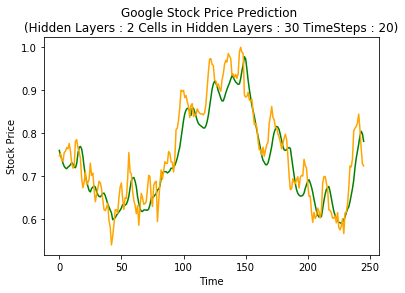

Epoch 1/55
704/704 [==============================] - 3s 4ms/step - loss: 0.0596
Epoch 2/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0082
Epoch 3/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0035
Epoch 4/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 5/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 6/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 7/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0023
Epoch 8/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 9/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0021
Epoch 10/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 11/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 12/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 13/55
704/704 [====

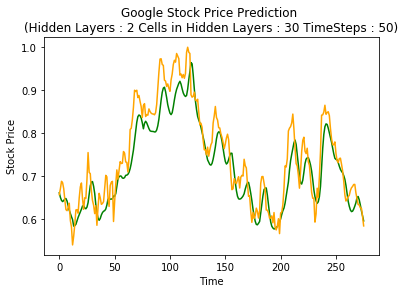

Epoch 1/55
679/679 [==============================] - 3s 5ms/step - loss: 0.0690
Epoch 2/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0085
Epoch 3/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0038
Epoch 4/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0030
Epoch 5/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 6/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 7/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0021
Epoch 8/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 9/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 10/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 11/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 12/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 13/55
679/679 [====

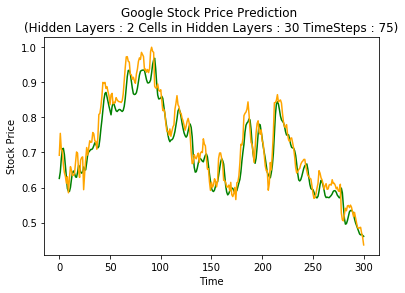

Epoch 1/55
734/734 [==============================] - 2s 3ms/step - loss: 0.0873
Epoch 2/55
734/734 [==============================] - 1s 860us/step - loss: 0.0084
Epoch 3/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 4/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 5/55
734/734 [==============================] - 1s 845us/step - loss: 0.0021
Epoch 6/55
734/734 [==============================] - 1s 752us/step - loss: 0.0020
Epoch 7/55
734/734 [==============================] - 1s 724us/step - loss: 0.0020
Epoch 8/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 9/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 10/55
734/734 [==============================] - 1s 696us/step - loss: 0.0018
Epoch 11/55
734/734 [==============================] - 1s 753us/step - loss: 0.0017
Epoch 12/55
734/734 [==============================] - 1s 761us/step - loss: 0.0017
Epoch 13/55

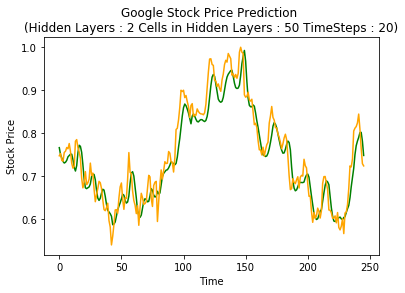

Epoch 1/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0599
Epoch 2/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0083
Epoch 3/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 4/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0023
Epoch 5/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 6/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0020
Epoch 7/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 8/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 9/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 10/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 11/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 12/55
704/704 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 13/55
704/704 [====

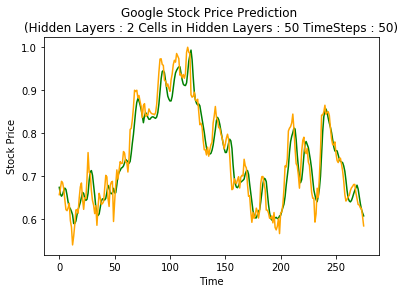

Epoch 1/55
679/679 [==============================] - 4s 6ms/step - loss: 0.0783
Epoch 2/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0082
Epoch 3/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0030
Epoch 4/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 5/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 6/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 7/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 8/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 9/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 10/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 11/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 12/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 13/55
679/679 [====

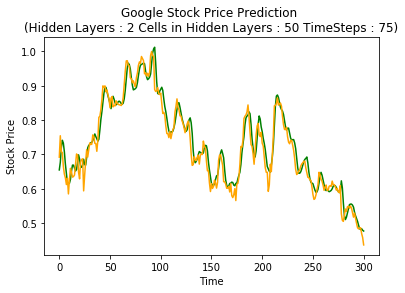

Epoch 1/55
734/734 [==============================] - 4s 5ms/step - loss: 0.0513
Epoch 2/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 3/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 4/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 5/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 6/55
734/734 [==============================] - 1s 811us/step - loss: 0.0017
Epoch 7/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 8/55
734/734 [==============================] - 1s 980us/step - loss: 0.0016
Epoch 9/55
734/734 [==============================] - 1s 854us/step - loss: 0.0017
Epoch 10/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 11/55
734/734 [==============================] - 1s 920us/step - loss: 0.0015
Epoch 12/55
734/734 [==============================] - 1s 789us/step - loss: 0.0015
Epoch 13/55
734

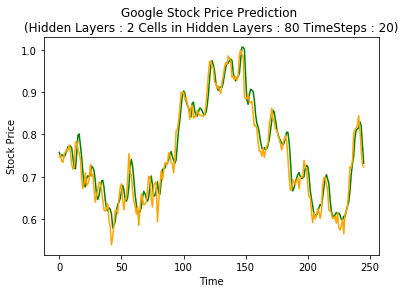

Epoch 1/55
704/704 [==============================] - 5s 8ms/step - loss: 0.0531
Epoch 2/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0042
Epoch 3/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 4/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 5/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 6/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0017
Epoch 7/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 8/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 9/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 10/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 11/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 12/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 13/55
704/704 [====

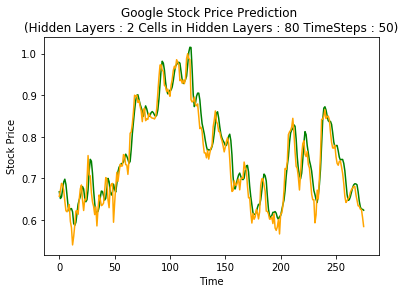

Epoch 1/55
679/679 [==============================] - 7s 10ms/step - loss: 0.0529
Epoch 2/55
679/679 [==============================] - 3s 5ms/step - loss: 0.0041
Epoch 3/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0023
Epoch 4/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0019
Epoch 5/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 6/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0019
Epoch 7/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0018
Epoch 8/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 9/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0016
Epoch 10/55
679/679 [==============================] - 3s 5ms/step - loss: 0.0016
Epoch 11/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0016
Epoch 12/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 13/55
679/679 [===

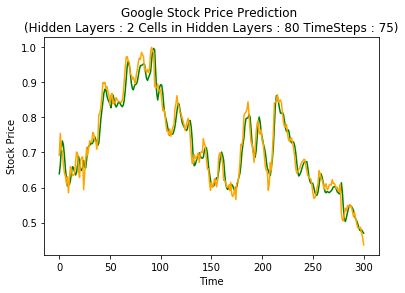

In [7]:
cells_hidden=[30,50,80]
time_steps=[20,50,75]
for i in cells_hidden:
    for j in time_steps:
        predict_layer2(j,i,stock_data,input_data,test_size)

Epoch 1/55
734/734 [==============================] - 5s 7ms/step - loss: 0.0969
Epoch 2/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 3/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 4/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0031
Epoch 5/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 6/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 7/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 8/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 9/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 10/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 11/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 12/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 13/55
734/734 [====

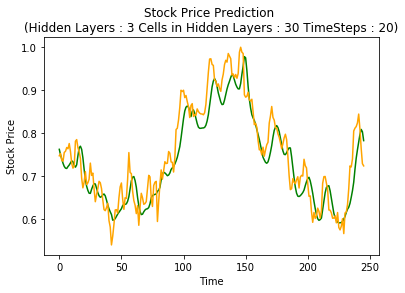

Epoch 1/55
704/704 [==============================] - 6s 9ms/step - loss: 0.0931
Epoch 2/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0137
Epoch 3/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0038
Epoch 4/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0028
Epoch 5/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 6/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 7/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 8/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 9/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 10/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0023
Epoch 11/55
704/704 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 12/55
704/704 [==============================] - 2s 2ms/step - loss: 0.0024
Epoch 13/55
704/704 [====

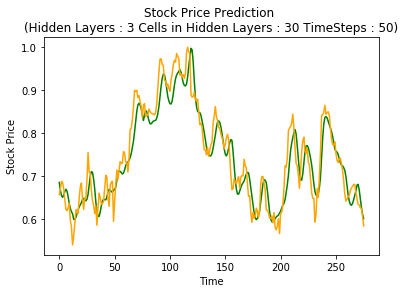

Epoch 1/55
679/679 [==============================] - 7s 11ms/step - loss: 0.0715
Epoch 2/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0109
Epoch 3/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0036
Epoch 4/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0029
Epoch 5/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0027
Epoch 6/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0026
Epoch 7/55
679/679 [==============================] - 2s 4ms/step - loss: 0.0026
Epoch 8/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0025
Epoch 9/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0025
Epoch 10/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0024
Epoch 11/55
679/679 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 12/55
679/679 [==============================] - 3s 4ms/step - loss: 0.0024
Epoch 13/55
679/679 [===

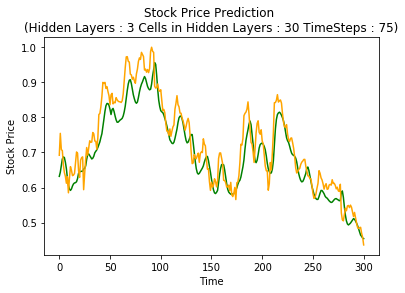

Epoch 1/55
734/734 [==============================] - 16s 22ms/step - loss: 0.0615
Epoch 2/55
734/734 [==============================] - 2s 3ms/step - loss: 0.0061
Epoch 3/55
734/734 [==============================] - 2s 3ms/step - loss: 0.0039
Epoch 4/55
734/734 [==============================] - 2s 2ms/step - loss: 0.0031
Epoch 5/55
734/734 [==============================] - 2s 3ms/step - loss: 0.0028
Epoch 6/55
734/734 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 7/55
734/734 [==============================] - 2s 2ms/step - loss: 0.0025
Epoch 8/55
734/734 [==============================] - 3s 4ms/step - loss: 0.0024
Epoch 9/55
734/734 [==============================] - 2s 2ms/step - loss: 0.0025
Epoch 10/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 11/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 12/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 13/55
734/734 [==

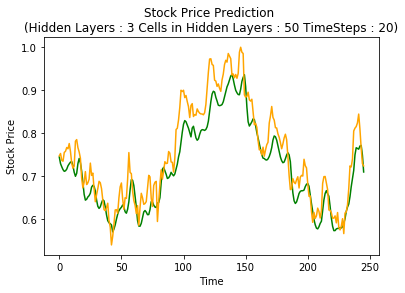

Epoch 1/55
704/704 [==============================] - 10s 14ms/step - loss: 0.0708
Epoch 2/55
704/704 [==============================] - 3s 4ms/step - loss: 0.0087
Epoch 3/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0033
Epoch 4/55
704/704 [==============================] - 3s 4ms/step - loss: 0.0030
Epoch 5/55
704/704 [==============================] - 3s 4ms/step - loss: 0.0029
Epoch 6/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 7/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 8/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0026
Epoch 9/55
704/704 [==============================] - 4s 5ms/step - loss: 0.0025
Epoch 10/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 11/55
704/704 [==============================] - 3s 4ms/step - loss: 0.0024
Epoch 12/55
704/704 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 13/55
704/704 [==

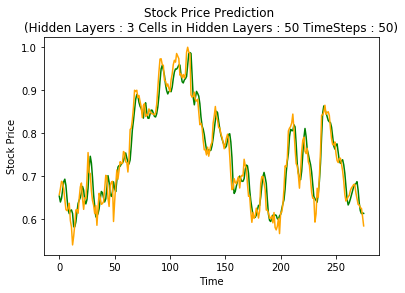

Epoch 1/55
679/679 [==============================] - 12s 17ms/step - loss: 0.0774
Epoch 2/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0070
Epoch 3/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0040
Epoch 4/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0033
Epoch 5/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0031
Epoch 6/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0027
Epoch 7/55
679/679 [==============================] - 4s 7ms/step - loss: 0.0028
Epoch 8/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0027
Epoch 9/55
679/679 [==============================] - 5s 8ms/step - loss: 0.0026
Epoch 10/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0024
Epoch 11/55
679/679 [==============================] - 5s 8ms/step - loss: 0.0027
Epoch 12/55
679/679 [==============================] - 5s 7ms/step - loss: 0.0023
Epoch 13/55
679/679 [==

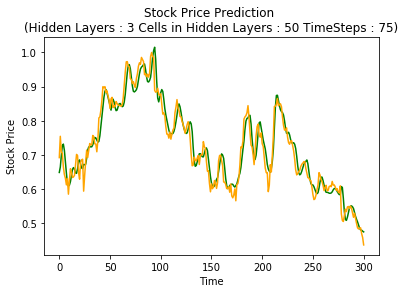

Epoch 1/55
734/734 [==============================] - 7s 9ms/step - loss: 0.0653
Epoch 2/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0042
Epoch 3/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0030
Epoch 4/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 5/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 6/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0025
Epoch 7/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 8/55
734/734 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 9/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 10/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 11/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 12/55
734/734 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 13/55
734/734 [====

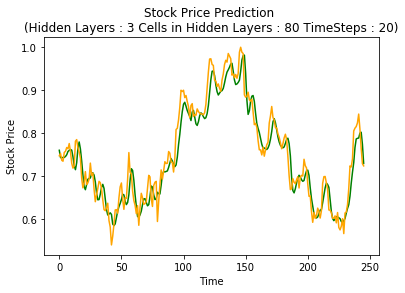

Epoch 1/55
704/704 [==============================] - 11s 16ms/step - loss: 0.0481
Epoch 2/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0059
Epoch 3/55
704/704 [==============================] - 4s 5ms/step - loss: 0.0038
Epoch 4/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0030
Epoch 5/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0025
Epoch 6/55
704/704 [==============================] - 4s 5ms/step - loss: 0.0023
Epoch 7/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0028
Epoch 8/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0024
Epoch 9/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0026
Epoch 10/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0024
Epoch 11/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0022
Epoch 12/55
704/704 [==============================] - 4s 6ms/step - loss: 0.0021
Epoch 13/55
704/704 [==

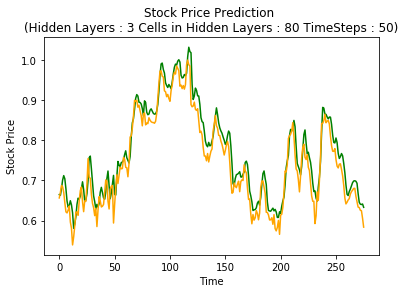

Epoch 1/55
679/679 [==============================] - 14s 21ms/step - loss: 0.0649
Epoch 2/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0068
Epoch 3/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0034
Epoch 4/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0027
Epoch 5/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0025
Epoch 6/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0023
Epoch 7/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0024
Epoch 8/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0022
Epoch 9/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0021
Epoch 10/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0025
Epoch 11/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0021
Epoch 12/55
679/679 [==============================] - 6s 9ms/step - loss: 0.0021
Epoch 13/55
679/679 [==

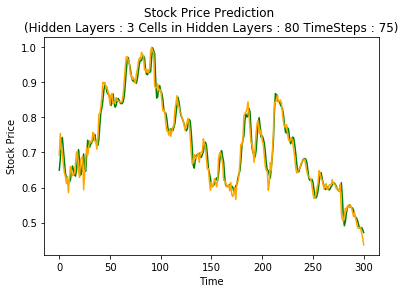

In [8]:
for i in cells_hidden:
    for j in time_steps:
        predict_layer3(j,i,stock_data,input_data,test_size)